In [1]:
import os, glob
import numpy as np
from tqdm import tqdm
import rasterio
from osgeo import gdal,ogr,osr
from matplotlib import pyplot as plt
from arsf_envi_reader import envi_header

In [3]:
# high_res_img = gdal.Open(r'D:\wenqu\site1b\radiance\site1b_all_radiance_final')
high_res_radiance = gdal.Open(r'D:\wenqu\multi_ortho\site2c\site2c_multi_or').ReadAsArray() 

high_res_radiance.shape

(273, 5470, 4744)

In [4]:
def remove_nan(numpy_file):
    dimension_list = []
    for i in range(numpy_file.shape[1]):
        numpy_file_channel = numpy_file[:, i]
        chech_nan = np.isnan(numpy_file_channel).all()
        if chech_nan == False:
            dimension_list.append(i)
            
    numpy_filter = numpy_file[:, dimension_list[0] : dimension_list[-1]+1]
    
    return numpy_filter, dimension_list

In [5]:
def load_numpy(file_path):
    path = file_path
    concate_list = []
    for filename in sorted(glob.glob(os.path.join(path, '*.npy'))):
        np_file = np.load(filename)
        np_file_filter, dimension_list = remove_nan(np_file)
        concate_list.append(np_file_filter)
    concate_file_array = np.concatenate(concate_list)
    
    return concate_file_array, dimension_list

    

In [6]:
# for filename in sorted(glob.glob(os.path.join(r'C:\Users\laral\site6_pixel_2', '*.npy'))):
#     print(filename)

In [7]:
# from pathlib import Path

In [8]:
# for filename in sorted(Path('D:/wenqu/pixel_all/100207/site1b_pixel_100207_1').glob("*.npy")):
#     print(filename)

In [9]:
concate_test_array, band_number = load_numpy(file_path = 'D:/wenqu/pixel_all/site2c_pixel')
concate_test_array.shape

(25949680, 122)

In [10]:
# band_number

In [11]:
in_header = envi_header.find_hdr_file(r"D:\wenqu\aviris\ang20190704t193319rfl\ang20190704t193319_rfl_v2v2_img.hdr")
header_data = envi_header.read_hdr_file(in_header)
# Get wavelengths and convert to NumPy array
low_res_wavelengths = header_data['wavelength'].split(',')
low_res_wavelengths = [float(w) for w in low_res_wavelengths]
normalized_wavelength = low_res_wavelengths[band_number[0]: band_number[-1]+1]
normalized_wavelength

[396.749576,
 401.759576,
 406.76957600000003,
 411.77957599999996,
 416.789576,
 421.799576,
 426.80957600000005,
 431.819576,
 436.819576,
 441.829576,
 446.839576,
 451.84957599999996,
 456.859576,
 461.869576,
 466.87957600000004,
 471.87957600000004,
 476.889576,
 481.899576,
 486.909576,
 491.919576,
 496.929576,
 501.93957600000005,
 506.94957600000004,
 511.94957600000004,
 516.959576,
 521.9695760000001,
 526.979576,
 531.9895759999999,
 536.999576,
 542.009576,
 547.009576,
 552.0195759999999,
 557.029576,
 562.039576,
 567.049576,
 572.059576,
 577.069576,
 582.0795760000001,
 587.0795760000001,
 592.089576,
 597.099576,
 602.1095760000001,
 607.1195759999999,
 612.1295759999999,
 617.139576,
 622.139576,
 627.149576,
 632.1595759999999,
 637.169576,
 642.179576,
 647.189576,
 652.199576,
 657.209576,
 662.209576,
 667.2195760000001,
 672.229576,
 677.2395759999999,
 682.249576,
 687.259576,
 692.269576,
 697.2695759999999,
 702.279576,
 707.289576,
 712.299576,
 717.309576,

In [12]:
concate_test_array.transpose(1,0).shape

(122, 25949680)

In [13]:
concate_test_array_reshape = concate_test_array.transpose(1,0).reshape(concate_test_array.shape[1], high_res_radiance.shape[1], high_res_radiance.shape[2] )
concate_test_array_reshape.shape

(122, 5470, 4744)

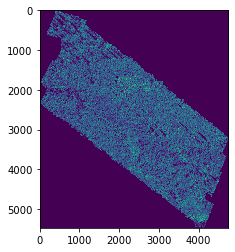

In [14]:
plt.imshow(concate_test_array_reshape[121,:, :], interpolation='nearest')
plt.show()

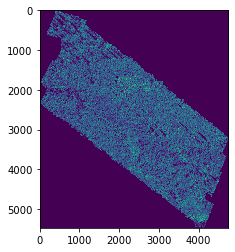

In [15]:
plt.imshow(high_res_radiance[272,:, :], interpolation='nearest')
plt.show()

In [16]:
src = rasterio.open(r'D:\wenqu\multi_ortho\site2c\site2c_multi_or')
src.tags()

{'Band_1': '398.697 nm',
 'Band_10': '418.63 nm',
 'Band_100': '617.953 nm',
 'Band_101': '620.168 nm',
 'Band_102': '622.383 nm',
 'Band_103': '624.598 nm',
 'Band_104': '626.812 nm',
 'Band_105': '629.027 nm',
 'Band_106': '631.242 nm',
 'Band_107': '633.456 nm',
 'Band_108': '635.671 nm',
 'Band_109': '637.886 nm',
 'Band_11': '420.844 nm',
 'Band_110': '640.101 nm',
 'Band_111': '642.315 nm',
 'Band_112': '644.53 nm',
 'Band_113': '646.745 nm',
 'Band_114': '648.959 nm',
 'Band_115': '651.174 nm',
 'Band_116': '653.389 nm',
 'Band_117': '655.603 nm',
 'Band_118': '657.818 nm',
 'Band_119': '660.033 nm',
 'Band_12': '423.059 nm',
 'Band_120': '662.248 nm',
 'Band_121': '664.462 nm',
 'Band_122': '666.677 nm',
 'Band_123': '668.892 nm',
 'Band_124': '671.106 nm',
 'Band_125': '673.321 nm',
 'Band_126': '675.536 nm',
 'Band_127': '677.751 nm',
 'Band_128': '679.965 nm',
 'Band_129': '682.18 nm',
 'Band_13': '425.274 nm',
 'Band_130': '684.395 nm',
 'Band_131': '686.609 nm',
 'Band_132

In [17]:
with rasterio.open(r'D:\wenqu\multi_ortho\site2c\site2c_multi_or') as src:
    meta = src.meta.copy()    

In [18]:
meta

{'driver': 'ENVI',
 'dtype': 'float32',
 'nodata': None,
 'width': 4744,
 'height': 5470,
 'count': 273,
 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST]]'),
 'transform': Affine(6.515209808597314e-07, -0.0, -150.1274412901464,
        -0.0, -2.510607278128304e-07, 67.35936318694638)}

In [19]:
meta.update({
    "count": concate_test_array_reshape.shape[0]
})

In [20]:
meta

{'driver': 'ENVI',
 'dtype': 'float32',
 'nodata': None,
 'width': 4744,
 'height': 5470,
 'count': 122,
 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST]]'),
 'transform': Affine(6.515209808597314e-07, -0.0, -150.1274412901464,
        -0.0, -2.510607278128304e-07, 67.35936318694638)}

In [21]:
output = 'D:/wenqu/simulation/site2c/site2c_simulation_update1'
with rasterio.open(output, "w", **meta) as dest:
    dest.write(concate_test_array_reshape)

In [ ]:
f_np1_filter = 

In [8]:
type(f_np1), f_np1.shape

(numpy.ndarray, (1000000, 425))

In [39]:
f_np1.shape[1]

425

In [16]:
f_np1[:, 1].shape

(1000000,)

In [28]:
channel_list_1 = []
for i in range(425):
    f_np1_channel = f_np1[:, i]
    a = np.isnan(f_np1_channel).all()
    if a == False:
        chan          nel_list_1.append(i)



In [55]:
def remove_nan(numpy_file):
    dimension_list = []
    for i in range(numpy_file.shape[1]):
        numpy_file_channel = numpy_file[:, i]
        chech_nan = np.isnan(numpy_file_channel).all()
        if chech_nan == False:
            dimension_list.append(i)
            
    numpy_filter = numpy_file[:, dimension_list[0] : dimension_list[-1]+1]
    
    return numpy_filter
        
    

In [21]:
f_np2 = np.load('D:/wenqu/pixel_site1b_test/1999999.npy')
f_np3 = np.load('D:/wenqu/pixel_site1b_test/2999999.npy')
f_np4 = np.load('D:/wenqu/pixel_site1b_test/3327631.npy')

In [44]:
f_np1_filter, f_np1_dimension = remove_nan(f_np1)
f_np1_filter.shape, len(f_np1_dimension)

((1000000, 122), 122)

In [22]:
channel_list_2 = []
for i in range(425):
    f_np2_channel = f_np2[:, i]
    a = np.isnan(f_np2_channel).all()
    if a == False:
        channel_list_2.append(i)

In [29]:
channel_list_1.sort() 
channel_list_2.sort() 
# l3.sort() 

if channel_list_1 == channel_list_2: 
    print ("The lists l1 and l2 are the same") 
else: 
    print ("The lists l1 and l2 are not the same")

The lists l1 and l2 are the same


In [27]:
len(channel_list_1), len(channel_list_2)

(0, 122)

In [42]:
len(channel_list_1)

122

In [31]:
def checkConsecutive(l):
    n = len(l) - 1
    return (sum(np.diff(sorted(l)) == 1) >= n)
     

print(checkConsecutive(channel_list_1))

True


In [33]:
f_np1_filter = f_np1[:, channel_list_1[0]: channel_list_1[-1]]
f_np1_filter.shape

(1000000, 121)

In [49]:
path = 'D:/wenqu/pixel_site1b_test/'
file_name = []
for a in glob.glob(os.path.join(path, '*.npy')):
    file_name.append(a)

In [50]:
file_name[1]

'D:/wenqu/pixel_site1b_test\\2999999.npy'

In [51]:
len(file_name)

4

In [57]:
np_list = []
np_list_filter = []
for i in range(4):
    np_name = 'np_' + str(i)
    np_list.append(np_name)
    np_name_filter = 'np_' + str(i) + '_filter'
    np_list_filter.append(np_name_filter)
np_list, np_list_filter

(['np_0', 'np_1', 'np_2', 'np_3'],
 ['np_0_filter', 'np_1_filter', 'np_2_filter', 'np_3_filter'])

In [54]:
type(np_list[1])

str

In [61]:
# for i in tqdm(range(high_res_img_flatten.shape[1])):
concate_list = []
for i in tqdm(range(4)):
    np_list[i] = np.load(file_name[i])
    np_list_filter[i] = remove_nan(np_list[i])
    concate_list.append(np_list_filter[i])

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:10<00:00,  2.72s/it]


In [62]:
concate_list_array = np.asarray(concate_list)
concate_list_array.shape

C:\Users\laral\AppData\Local\Temp\ipykernel_1548\3616178396.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  concate_list_array = np.asarray(concate_list)


(4,)

In [8]:
concate_file = np.concatenate(concate_list)

In [9]:
concate_file.shape

(3327632, 425)

In [10]:
concate_file2 = concate_file.reshape(1022, 3256,425)

In [11]:
print(concate_file2[:, :, 1])


[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [16]:
normalize_num = []
for i in range(425):
    file_array = concate_file2[:, :, i]
# 

    a = np.isnan(file_array).all()
#     print(a, type(a))
    if str(np.isnan(file_array).all()) == 'False':
#         print(i)
        normalize_num.append(i)
        
#         print


In [17]:
normalize_num

[4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125]

In [31]:
len(normalize_num)

122

In [20]:
concate_new = []
for i in normalize_num:
    print(i)    
    concate_new.append(concate_file2[:, :, i])


4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125


In [21]:
len(concate_new)

122

In [24]:
concate_new_array = np.array(concate_new)

In [22]:
src1 = rasterio.open(r'D:\wenqu\site1b\uav\site1b_multi_or_radiance')

In [23]:
with rasterio.open(r'D:\wenqu\site1b\uav\site1b_multi_or_radiance') as src:
    meta = src.meta.copy()

In [31]:
meta.update({
    "driver": "envi",
    "height": concate_new_array.shape[1],
    "width": concate_new_array.shape[2],
    "count": 122,
    "transform": src.transform

})

In [32]:
output = 'D:/wenqu/simulation/site1b_simulation_test'

In [33]:
with rasterio.open(output, "w", **meta) as dest:
    dest.write(concate_new_array)